In [5]:
using Revise
#using Random, Distributions
using CSV
using DataFrames
using StatsBase
using CairoMakie

include("../src/main.jl")
import .SpectralStatistics as stats

In [7]:
folder = pwd() * "/data"
filename = "/kspectrum.csv"
#names = [Symbol("e"), Symbol("ten")]
df = DataFrame(CSV.File(folder * filename, header=0) )
k = df.Column1 #.^ 2

kspect = stats.RealSpectrum(k) 
spectrum = stats.unfold_spectrum(kspect,2)

Main.SpectralStatistics.UnfoldedSpectrum([1.0940642712913193, 1.9746928556581549, 2.8803207222666503, 3.9394763666570034, 5.0920250686472315, 6.357342804915971, 6.9240484062003596, 7.80960865872006, 9.288028584457333, 9.71947163179379  …  2.0059707561756272e6, 2.0059711700619753e6, 2.0059716062732558e6, 2.0059742392940484e6, 2.0059757933053325e6, 2.0059768705632384e6, 2.0059773683687544e6, 2.0059779242460146e6, 2.0059791908691053e6, 2.005980691908318e6])

In [58]:
folder = pwd() * "/data"
filename = "/unfolded_spectrum2.csv"
#names = [Symbol("e"), Symbol("ten")]
df = DataFrame(CSV.File(folder * filename, header=0) )
e = df.Column1

spectrum = stats.UnfoldedSpectrum(e) #unfolded spectrum Type


Main.SpectralStatistics.UnfoldedSpectrum([0.020088869907476454, 1.0494204378135181, 2.3443588189274003, 2.7007302715690384, 4.225299772199284, 4.954697313138514, 6.4385422292229695, 6.891930954946573, 7.798894957336686, 9.13404935933204  …  2.0010886788305254e6, 2.0010892571556424e6, 2.0010897350300865e6, 2.0010909726256414e6, 2.001091881786611e6, 2.0010930896167953e6, 2.0010942810629837e6, 2.0010952298994954e6, 2.0010957879009813e6, 2.0010970790590371e6])

In [8]:
d = stats.mode_fluctuations(spectrum) 

0.0


2005981-element Vector{Float64}:
 -0.09406427129131933
  0.02530714434184511
  0.11967927773334974
  0.0605236333429966
 -0.09202506864723148
 -0.35734280491597126
  0.07595159379964045
  0.19039134127994028
 -0.2880285844573329
  0.28052836820621074
  0.02535901209853364
  0.031890388203267506
  0.20646257098412413
  ⋮
  1.7994910788256675
  0.8482678360305727
  1.2438243727665395
  1.8299380247481167
  2.393726744223386
  0.7607059516012669
  0.20669466746039689
  0.12943676160648465
  0.6316312456037849
  1.0757539854384959
  0.8091308947186917
  0.3080916819162667

In [9]:
min_e = 1500000
de = 10000
max_e = min_e + de

function moving_average(A::AbstractArray, m::Int)
    out = similar(A)
    R = CartesianIndices(A)
    Ifirst, Ilast = first(R), last(R)
    I1 = m÷2 * oneunit(Ifirst)
    for I in R
        n, s = 0, zero(eltype(out))
        for J in max(Ifirst, I-I1):min(Ilast, I+I1)
            s += A[J]
            n += 1
        end
        out[I] = s/n
    end
    return out
end

function isin_energy_window(e, min_e, max_e)
    return e > min_e && e < max_e
end

idx = findall(e -> isin_energy_window(e, min_e, max_e), spectrum.data);

width = 101
d_mean = moving_average(d[idx], width);
e_mean = moving_average(spectrum.data[idx], width);

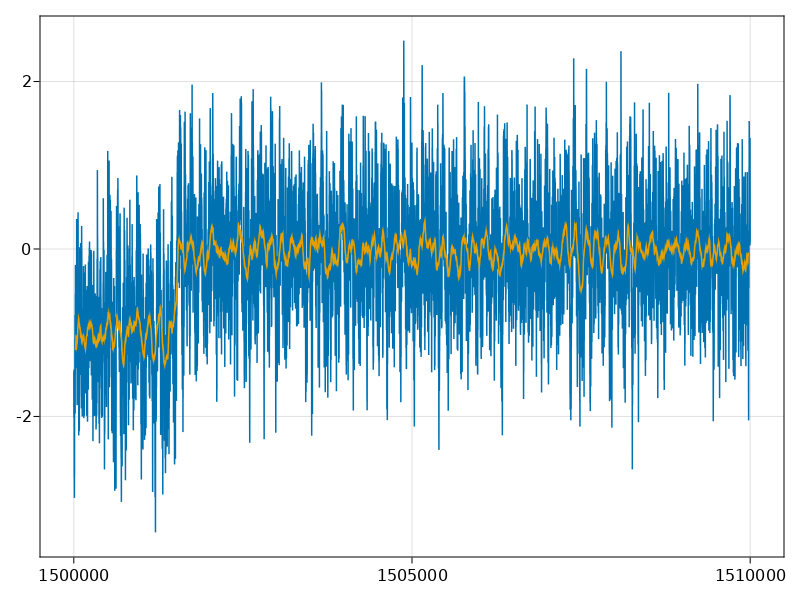

In [10]:

f, ax, l1 = lines(spectrum.data[idx],d[idx])
l2 = lines!(ax,e_mean , d_mean)
f

In [38]:
es

200-element Vector{Float64}:
 10000.0
 10150.75376884422
 10301.507537688442
 10452.261306532664
 10603.015075376885
 10753.768844221106
 10904.522613065328
 11055.276381909547
 11206.03015075377
 11356.78391959799
 11507.537688442211
 11658.291457286432
 11809.045226130653
     ⋮
 38341.70854271357
 38492.462311557785
 38643.21608040202
 38793.969849246234
 38944.72361809045
 39095.477386934675
 39246.23115577889
 39396.98492462312
 39547.738693467334
 39698.49246231156
 39849.246231155776
 40000.0

In [70]:
goe = stats.GOE(); #model Type 

In [71]:
min_s = 0.0
max_s = 5.0
grid = 200
var = collect(LinRange(min_s, max_s, grid))
#statistic = "level_spacing_pdf"
n = 1 #order of level spacing n= 1 means nearest neighbour
x, res = stats.level_spacing_pdf(spectrum, var; n=n)
model = stats.level_spacing_pdf(goe, var);

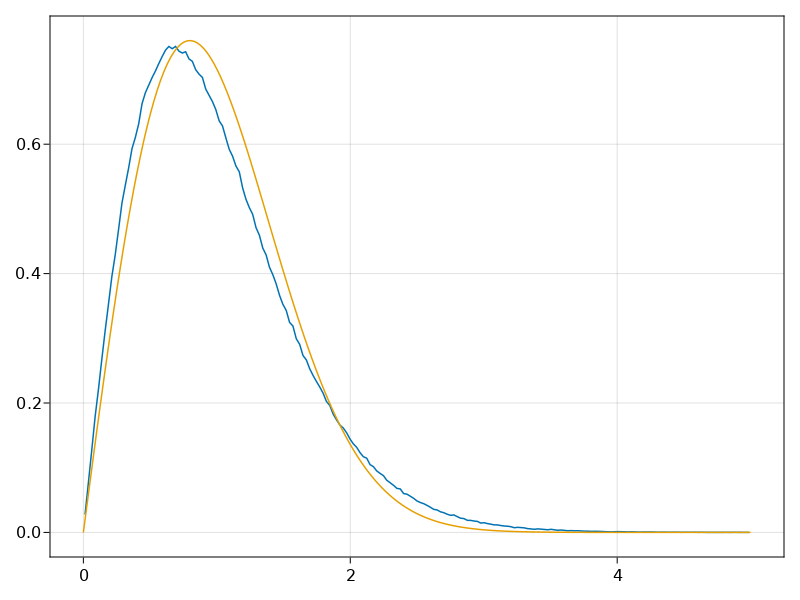

In [72]:
f, ax, l1 = lines(x,res)
l2 = lines!(ax, var, model)
f

In [75]:
min_l = 0.0
max_l = 10.0
grid = 200
var = collect(LinRange(min_l, max_l, grid))
#statistic = "number_variance"
res = stats.number_variance(spectrum, var)
model = stats.number_variance(goe, var);

LoadError: MethodError: no method matching getindex(::Main.SpectralStatistics.UnfoldedSpectrum, ::Int64)

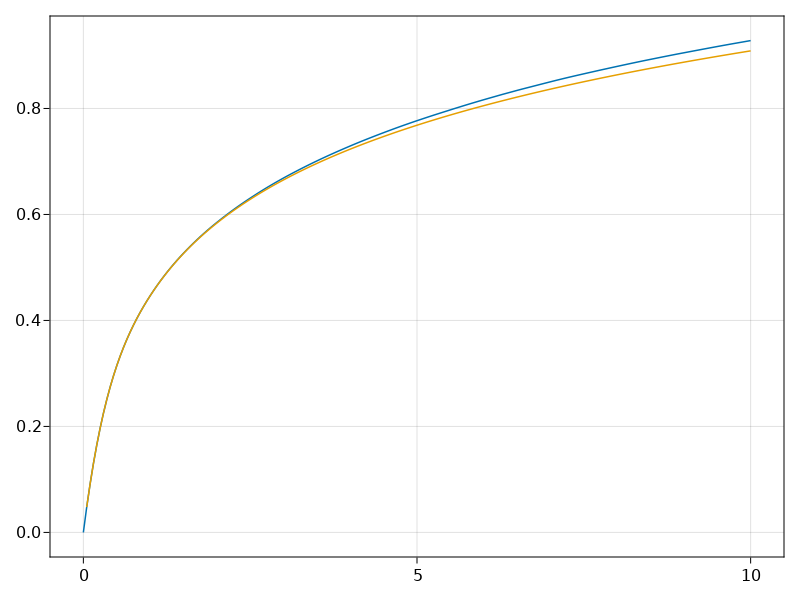

In [10]:
f, ax, l1 = lines(var,res)
l2 = lines!(ax, var, model)
f